# Crypto Volatility Explorer
The crypto market is notoriously volatile, but with a total market cap of $1.7tn USD, it is a tempting place to invest and speculate.

In order to help people make sound decisions on their crypto investments, I've built this tool that shows the recent winners and losers, and allows you to explore their recent performance in depth.

In [6]:
#Import packages
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime
import plotly.graph_objects as go

In [2]:
#Seaborn Graph settings
style.use('ggplot')

# Top Cryptocurrencies by Market Cap
Using CoinGecko's API, I pull the most recent data for the top 250 coins by market share. There are currently in excess of 12,000 coins recognized, but once you get passed the top 50-100, the vast majority are alt-coins or meme-coins, which can be very risky for investment

In [3]:
#Set Parameters for request from CoinGecko API
currency = 'usd'# Ex. usd, eur, gbp, jpy, etc.
limit = '250' # Max. 250
marketurl = f'https://api.coingecko.com/api/v3/coins/markets?vs_currency={currency}&order=market_cap_desc&per_page={limit}&page=1&sparkline=false&price_change_percentage=24h%2C7d%2C30d%2C1y'
marketdata = requests.get(marketurl)
marketdatajson = marketdata.json()
marketdatadf = pd.DataFrame(marketdatajson)

In [4]:
#Check Dataframe
#print(marketdatadf.head())
#print(marketdatadf.shape)

# Top 10 Cryptocurrencies by Market Cap
Looking at the top 10 coins by market cap, we see that Bitcoin still dominates, and dominates so strongly that the 10th bigest coin by market cap appears tiny even on a logarythmic scale (right graph). These coins may be relatively stable, and so could be seen as a stronger choice for long-term investment, but would be unlikely to produce significant short-term gains.

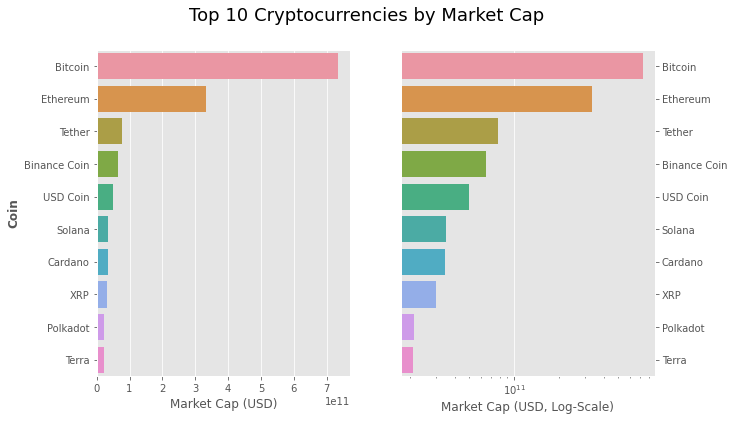

In [7]:
# Setup DF for Top 10 by Market Cap
top10 = marketdatadf.iloc[:10]
top10 = top10[['id','name','market_cap']]

# Plot Top 10 by market cap (linear scale)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle('Top 10 Cryptocurrencies by Market Cap', size=18)
ax = sns.barplot(x='market_cap',y='name', data=top10, ax=axes[0])
axes[0].set_xlabel('Market Cap (USD)')
axes[0].set_ylabel('Coin', size=12, weight='bold')

# Top 10 by market cap (log scale)
ax = sns.barplot(x='market_cap',y='name', data=top10, ax=axes[1])
axes[1].set_xlabel('Market Cap (USD, Log-Scale)')
axes[1].set_ylabel('')
axes[1].set_xscale('log')
axes[1].yaxis.tick_right()

# Market Volatility
To help identify the most volatile coins, the below code defines a function to plot the top 10 winners and losers over a defined period.

In [8]:
# Create a Volatility dataframe, selecting the relevant columns, and dropping all NaN rows.
volatility = marketdatadf[['id','price_change_percentage_24h_in_currency','price_change_percentage_7d_in_currency','price_change_percentage_30d_in_currency']]
volatility = volatility.dropna()

In [17]:
# Define a function to plot winners and losers graph
def top10_sns_subplot(df, col, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    fig.suptitle(title, size = 18)
    
    # Plot with seaborn the chart for the top 10 winners
    ax = sns.barplot(x=col, y='id', data = df[-10:], color='darkblue', ax=axes[0])
    ax.set_ylabel('Coin', weight = 'bold')
    axes[0].set_xlabel('% Change')
    axes[0].set_title('Winners')
    
    # Plot with seaborn the chart for the top 10 losers
    ax = sns.barplot(x=col, y='id', data = df[:10], color='darkred', ax=axes[1])
    axes[1].set_xlabel('% Change')
    axes[1].set_ylabel('')
    axes[1].set_title('Losers')
    axes[1].yaxis.tick_right()
    
    # Returning this for good practice, might use later
    return fig, ax
    

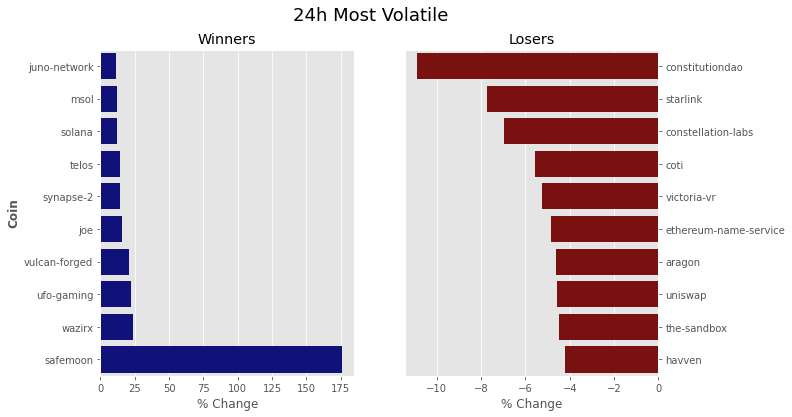

In [18]:
# Sort values, set up params to call above function. In this case, 24hrs (valid values = 24h, 7d, 30d)
period = '24h'
col = f'price_change_percentage_{period}_in_currency'
df = volatility.sort_values(col)
title = f"{period} Most Volatile"


fig, ax = top10_sns_subplot(df, col, title)

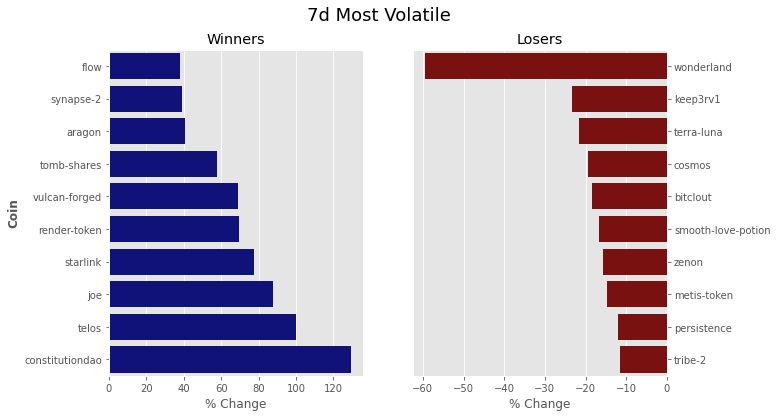

In [20]:
# Sort values, set up params to call above function. In this case, 7 days. (valid values = 24h, 7d, 30d)

period = '7d'
col = f'price_change_percentage_{period}_in_currency'
df = volatility.sort_values(col)
title = f"{period} Most Volatile"

fig, ax = top10_sns_subplot(df, col, title)

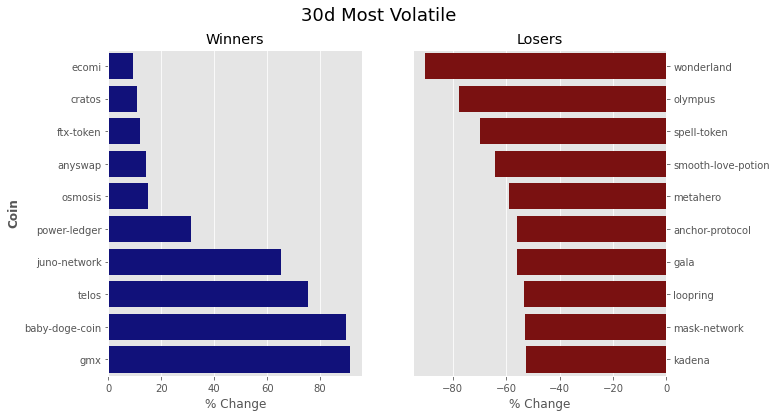

In [21]:
# Sort values, set up params to call above function. In this case, 30 days. (valid values = 24h, 7d, 30d)
period = '30d'
col = f'price_change_percentage_{period}_in_currency'
df = volatility.sort_values(col)
title = f"{period} Most Volatile"

fig, ax = top10_sns_subplot(df, col, title)

# Individual Market Analysis
Now we can see at a glance how the biggest movers have performed recently, lets dig down into the performance of any individual coin.

In the input field below, type the id of whichever coin you want to study. (the id is how the coin appears on the y-label of the above graphs, and typically are lower case with dashes in place of spaces. If left blank, the input defaults to bitcoin)

Once the coin is selected and the below code run, you can hover over any data point on the candlestick graph for more info.

In [35]:
coin = str(input()) or 'bitcoin'
print(f'You will now pull {coin} data.')

gmx
You will now pull gmx data.


In [36]:
coinurl = f'https://api.coingecko.com/api/v3/coins/{coin}/market_chart?vs_currency=usd&days=30'
coindata = requests.get(coinurl)
coindatajs = coindata.json()
coindatadf = pd.DataFrame(coindatajs)

In [37]:
#coindatadf.head() # DF check before edit

In [38]:
# Split the column-lists to individual columns
coindatadf[['timestamp','prices']] = pd.DataFrame(coindatadf.prices.tolist(), index= coindatadf.index)
coindatadf[['timestamp','market_caps']] = pd.DataFrame(coindatadf.market_caps.tolist(), index= coindatadf.index)
coindatadf[['timestamp','total_volumes']] = pd.DataFrame(coindatadf.total_volumes.tolist(), index= coindatadf.index)

# Convert Timestamp to Datetime column
coindatadf['date'] = coindatadf['timestamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000))


In [39]:
#coindatadf.head() # DF check after edit

In [40]:
# Setup and show Candlestick Graph for chosen coin
candlestick_data = coindatadf.groupby(coindatadf.date, as_index=False).agg({"prices": ['min', 'max', 'first', 'last']})
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                                    open=candlestick_data['prices']['first'],
                                    high=candlestick_data['prices']['max'],
                                    low=candlestick_data['prices']['min'],
                                    close=candlestick_data['prices']['last']),
                                     ])
fig.update_layout(xaxis_rangeslider_visible=False,
                  title=f"{coin} 30 Day History",
                  xaxis_title="Date",
                  yaxis_title="Price (USD)")
fig.show()



# Thank You!
I hope you enjoyed this project.